In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
filename ="data/hotel_bookings.csv"
df=pd.read_csv(filename)

# Limpieza de datos con Python:
Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).
Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, una estancia de 1000 noches).

In [244]:
#Manejo de valores faltante
#asumiendo que los valores nulos de la columna children significa que no habia niños
df['children'] = df['children'].fillna(0)
# Con solo 6,797 valores no nulos (menos del 6% del total), esta columna carece de suficiente información como para justificar su inclusión
df=df.drop(columns=['company'])
# Dado que tienes solo una pequeña cantidad de valores nulos (488 valores), obte por el valor mas comun de la co
moda_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(moda_country)
#para poder evitar errores, poner 0 para que represente unknown
df['agent']=df['agent'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [246]:
#Detección y eliminación de valores duplicados
df = df.drop_duplicates()

In [248]:
#Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')#formato fatetime
ca_va = df.select_dtypes(include=['object']).columns.tolist()

In [250]:
# combinar para ddar con la fecha completa
df['date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + ' ' + 
    df['arrival_date_month'] + ' ' + 
    df['arrival_date_day_of_month'].astype(str), 
    format='%Y %B %d'
)


In [252]:
#monstrar que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos
df[ca_va] = df[ca_va].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87370 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87370 non-null  category      
 1   is_canceled                     87370 non-null  int64         
 2   lead_time                       87370 non-null  int64         
 3   arrival_date_year               87370 non-null  int64         
 4   arrival_date_month              87370 non-null  category      
 5   arrival_date_week_number        87370 non-null  int64         
 6   arrival_date_day_of_month       87370 non-null  int64         
 7   stays_in_weekend_nights         87370 non-null  int64         
 8   stays_in_week_nights            87370 non-null  int64         
 9   adults                          87370 non-null  int64         
 10  children                        87370 non-null  float64       
 11  babies

In [122]:
#Consistencia en valores categóricos
# He utilizado el método unique() en cada columna categórica del DataFrame para identificar 
# posibles inconsistencias en los valores. Tras revisar los resultados, no he encontrado 
# ninguna inconsistencia en los valores categóricos, lo que indica que todos los registros 
# son consistentes en su formato y contenido.

In [262]:
#Detección de datos anómalos
#creo que 200 es un numero rasonable para quitar anomalias
df['lead_time'] = df['lead_time'].clip(upper=200)
df['lead_time'].value_counts()

lead_time
200    9265
0      5970
1      3213
2      1925
3      1704
       ... 
198     117
194     111
182     110
197     109
196     109
Name: count, Length: 201, dtype: int64

In [178]:
#creo que 5 es un numero rasonable para quitar anomalias
df['children'] = df['children'].clip(upper=5)
df['children'].value_counts()

children
0.0    79006
1.0     4695
2.0     3593
3.0       75
5.0        1
Name: count, dtype: int64

In [256]:
#creo que 4 es un numero rasonable para quitar anomalias
df['adults'] = df['adults'].clip(upper=4)
df['adults'].value_counts()

adults
2    64488
1    16486
3     5935
0      385
4       76
Name: count, dtype: int64

In [297]:
#creo que 4 es un numero rasonable para quitar anomalias
df['babies'] = df['babies'].clip(upper=4)
df['babies'].value_counts()

babies
0    86456
1      897
2       15
4        2
Name: count, dtype: int64

# No se encontraron más anomalías después de la corrección.

# Exploración de datos con Python:
Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

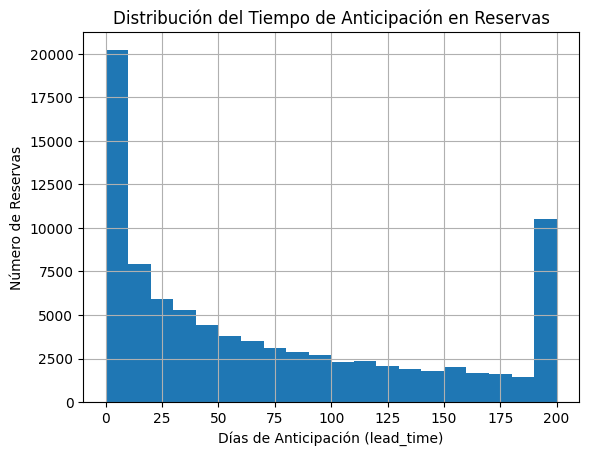

In [282]:
#Crea dos tipos diferentes de visualizaciones univariadas
df['lead_time'].hist(bins=20)
plt.xlabel('Días de Anticipación (lead_time)')
plt.ylabel('Número de Reservas')
plt.title('Distribución del Tiempo de Anticipación en Reservas')
plt.show()

# Interpretación:
# El histograma muestra que la mayoría de las reservas tienen un lead_time (días de anticipación)
# de alrededor de 0 días, con más de 20,000 personas reservando sin antelación significativa. Esto sugiere
# que una gran parte de los clientes hace reservas de último minuto. Además, hay otro grupo notable que 
# reserva con al menos 200 días de anticipación, con más de 10,000 personas. Estos dos picos indican 
# diferentes comportamientos de los clientes: aquellos que planean sus estadías con mucha antelación y 
# otros que realizan reservas a corto plazo.
plt.show()

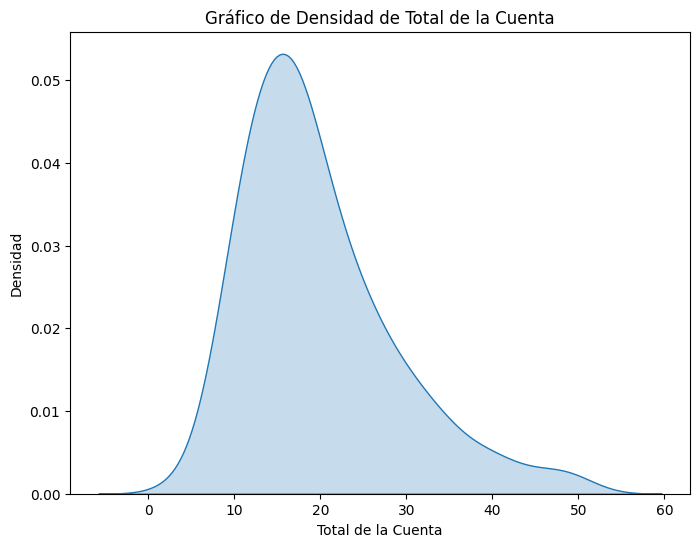

In [286]:
tips = sns.load_dataset('tips')
plt.figure(figsize=(8, 6))
sns.kdeplot(tips['total_bill'], fill=True)
plt.title('Gráfico de Densidad de Total de la Cuenta')
plt.xlabel('Total de la Cuenta')
plt.ylabel('Densidad')
plt.show()


# Interpretación:
# El gráfico de densidad muestra la distribución del total de la cuenta (total_bill) en el conjunto de datos de tips.
# La densidad comienza a aumentar a partir de un valor cercano a 5 en el eje x y alcanza su máximo alrededor de 15, con una
# densidad superior a 0.05. Este pico sugiere que la mayoría de las cuentas tienden a acumularse en torno a ese valor.
# Después de los 20 en el eje x, la densidad disminuye, lo que indica que los valores de las cuentas superiores a 20
# son menos comunes. Esta distribución podría señalar precios comunes para las cuentas, reflejando tanto la frecuencia
# como el rango de los totales de cuenta en el datase

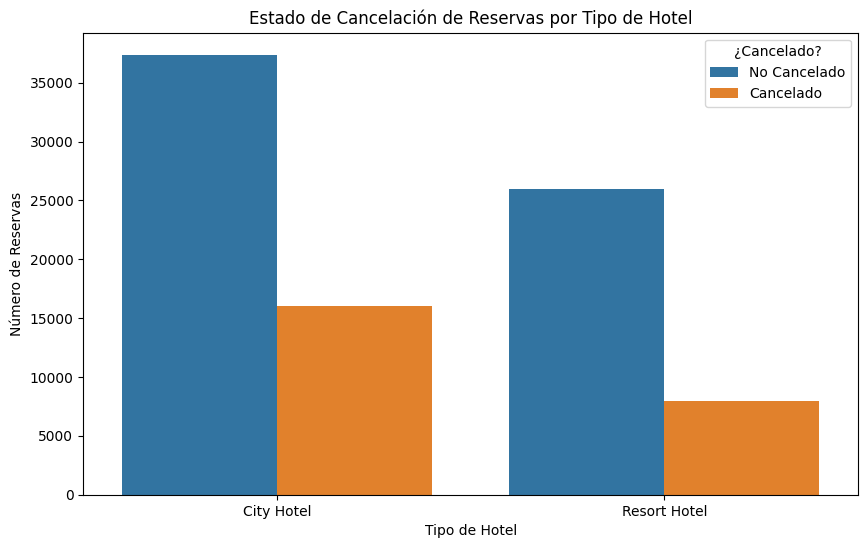

In [288]:
#Crea dos tipos diferentes de visualizaciones multivariadas. 
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.title('Estado de Cancelación de Reservas por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Número de Reservas')
plt.legend(title='¿Cancelado?', labels=['No Cancelado', 'Cancelado'])
plt.show()

# Interpretación:
# Este gráfico de barras apiladas compara el número de reservas canceladas y no canceladas en cada tipo de hotel.
# Una proporción alta de cancelaciones puede indicar problemas con las reservas en ciertos tipos de hotel.

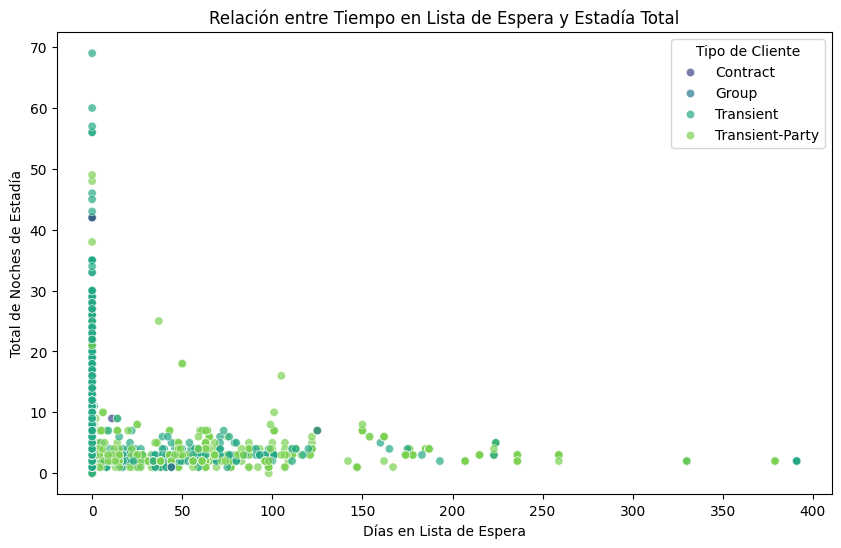

In [306]:
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='days_in_waiting_list', y='total_stays', hue='customer_type', palette='viridis', alpha=0.7)
plt.title('Relación entre Tiempo en Lista de Espera y Estadía Total')
plt.xlabel('Días en Lista de Espera')
plt.ylabel('Total de Noches de Estadía')
plt.legend(title='Tipo de Cliente')
plt.show()

# Interpretación:
# Este gráfico de dispersión explora la relación entre los días en lista de espera y el total de noches de estadía,
# con un matiz según el tipo de cliente. Los puntos en la parte superior muestran estadías largas con más días
# de espera, lo cual podría estar relacionado con reservaciones anticipadas o demanda alta.

# Análisis adicional:
Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

In [310]:
#Estadísticas descriptivas

In [314]:
print(f'el resumen estadistico {df.describe()}')

el resumen estadistico         is_canceled     lead_time  arrival_date_year  \
count  87370.000000  87370.000000       87370.000000   
mean       0.274969     72.732380        2016.210290   
min        0.000000      0.000000        2015.000000   
25%        0.000000     11.000000        2016.000000   
50%        0.000000     49.000000        2016.000000   
75%        1.000000    125.000000        2017.000000   
max        1.000000    200.000000        2017.000000   
std        0.446501     68.811444           0.686116   

       arrival_date_week_number  arrival_date_day_of_month  \
count              87370.000000               87370.000000   
mean                  26.839533                  15.815360   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  23.000000   
max                   53.000000       

Análisis de tendencias
Días de anticipación de reserva (lead_time):
La mayoría de las reservas fueron realizadas con poca anticipación, con un pico considerable de reservas hechas desde 0 días de antelación, superando los 20,000 clientes en este rango. Esto sugiere una tendencia fuerte hacia reservas de último minuto. Sin embargo, también se observa un segundo grupo significativo de reservas hechas con 200 días de antelación, reflejando que ciertos clientes planifican con mucho tiempo de anticipación, posiblemente para asegurarse fechas específicas.

Tiempo en lista de espera y estadía total:
Los clientes que no realizaron reservas anticipadas (0 días de lista de espera) muestran una gran variedad en la duración de su estadía, siendo comunes estadías de entre 40 y 60 días. En cambio, aquellos con tiempos de espera entre 1 y 100 días tienden a estadías mucho más breves, generalmente inferiores a 10 días. Esto sugiere que estadías prolongadas son más comunes entre quienes evitan tiempos de espera, mientras que quienes esperan tienden a estancias cortas.

In [ ]:
#fuente
#muchas partes de este codigo es basado a las dos pruebas anteriores resueltas de este modulo.
#tambien codigo prehecho y posteriormente editado por mi para esta prueba de la pagina principal de dojo coding latam